In [1]:
from scipy.stats import invgamma, t, norm, gamma
import numpy
import matplotlib.pyplot as plt

In [8]:
# Sample comparison between drawing first from a invgamma, and then directly from student t

conjugate_normal_model_priors = {
    "mean": 0,
    "l": 1.0,
    "alpha": 10.0,
    "beta": 10.0,
}
# Sample from our updated distributions
sample_size = 900000

# Samples the "original" way:
sigma_squared_samples = invgamma.rvs(
    conjugate_normal_model_priors["alpha"],
    loc=0,
    scale=conjugate_normal_model_priors["beta"],
    size=sample_size,
)
samples_original_way = norm.rvs(
    loc=conjugate_normal_model_priors["mean"],
    scale=numpy.sqrt(sigma_squared_samples / conjugate_normal_model_priors["l"]),
)

# scales = numpy.array([x.T @ self.v @ x for x in x_te]) + 1
# scales = (self.b / self.a * scales) ** 0.5


######## Find out why this * 2 is necessary to equalize the distributions!!!!!
scale = (conjugate_normal_model_priors["beta"] * 2) / (
    conjugate_normal_model_priors["alpha"] * (conjugate_normal_model_priors["l"] + 1)
)
samples_t = t(
    df=2 * conjugate_normal_model_priors["alpha"],
    loc=conjugate_normal_model_priors["mean"],
    scale=scale,
).rvs(size=sample_size)

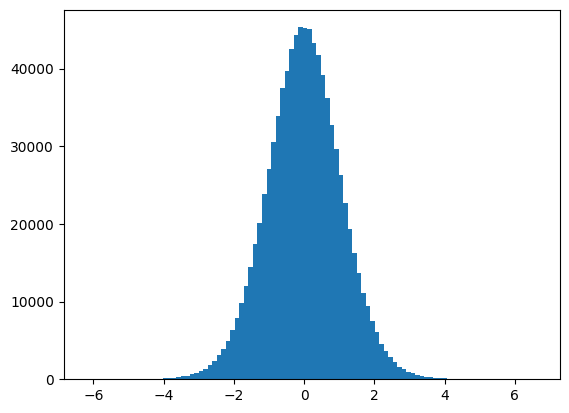

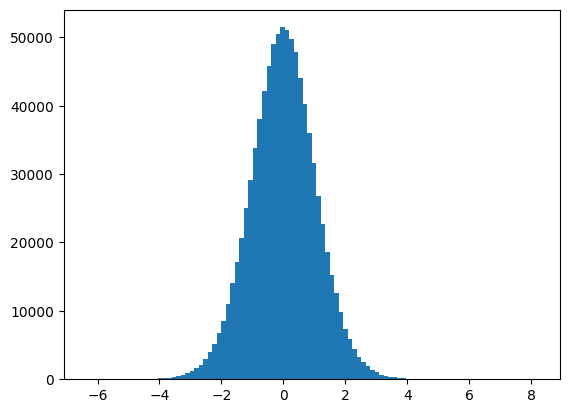

In [9]:
plt.hist(samples_original_way, bins=100)
plt.show()
plt.hist(samples_t, bins=100)
plt.show()

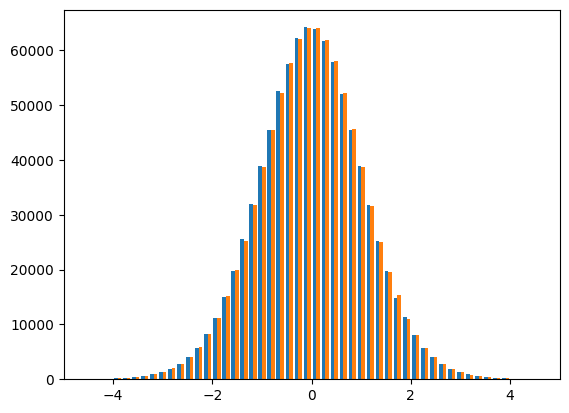

In [10]:
plt.hist([samples_original_way, samples_t], bins=80)
plt.xlim(-5, 5)
plt.show()